This blog will cover six parts to explain the decision tree classifier:

1. *What is decision tree*
2. *How does *decision tree *work*
3. *How does *decision tree *choose how to split*
4. *How to implement decision tree in Python*


### 1. What is Decision Tree

Let’s use an example to illustrate it. Imagine you want to predict whether it is going to snow tomorrow? or not?, so that you can decide whether to wake up early or not to shove the snow.<br>
To predict this event, you utilize the historical weather data, and here is the related scattered plot for the given data.<br>
![title](Capture1.PNG)

As you can see in the plot, all the red data point -  the snow instances - happen under the temperature lower than 30 and the humidity level above 70. If we transfer this scatter plot into a decision tree diagram, it should look like something below:<br>
![title](Capture2.PNG)

For this snow dataset, you can predict whether it is going to snow or not perfectly by asking two questions:<br>

1. Is Temperature below 30 ? 
2. Is Humidity above 70 ?



### 2. How does decision tree algorithm work?

After get a sense of what's the decision tree, let's dive in how decision tree algorithm work. Decision tree can be using on both regression (for continuous variable) and classification (categorical variable) task. For simplicity, this blog will only touch on the latter, decision tree classifier.<br>

***Decision tree classification algorithm contains three steps: grow the tree, prune the tree, assign the class.***<br>

If you are like me, you may ask what is prune🙄....<br>
*prune: *to cut or lop off (twigs, branches, or roots). to cut or lop superfluous or undesired twigs, branches, or roots from tree.<br>

Okay, intuitively: <br>

1. Grow the tree: splitting the space by setting rules<br>
2. Prune the tree: removing the unnecessary splits<br>
3. Assign the class: using the class with majority votes as the prediction<br>

This blog will focusing on the rationale behind growing the tree, if you are interested in the pruning the tree please refer to the link in the further reading.<br>





### 3. How Decision Tree choose where to split?

Decision tree split based on three key concepts:<br>

1. Pure and Impure
2. Impurity measurement
3. Information Gain


Let's explained these three concepts one by one like you are five.<br>

***1. Pure and Impure***<br>
- A tree-node is pure if the node contains a data only related one single class, e.g. all snow days.
- A tree-node is impure if the node contains a data related to multiple classes, for example node contains some snow days and some non snow days.
So, which trees' nodes are purer, A or B?<br> 
![title](Capture3.PNG)


A, right!<br>
because either left or right node under Tree A contains only one class -  PURE<br>

B, is impure, because either left or right node under Tree B contains two classes - IMPURE.<br>

Hold on a second, if you want to predict snow or not, which question will you ask A or B?<br>

Your answer is probably 'A' even you don't know what is decision tree, because Question B basically does not give you any useful information, but by asking A, you can clearly get your answer.<br>


***Same thing, decision tree's underlying logic is trying to find those RIGHT questions to ask so that leads to the purest nodes (or the least impure nodes).***<br>


So could we quantify the impurity of the node, instead of just roughly eyeballing? Yes we can.<br>

***2. Impurity measurement***

Two most common impurity functions are Entropy and Gini (index). 
the range of Entropy is from 0 to 1 and the range of Gini Index is from 0 to 0.5.<br>
The higher value of the impurity function either Entropy or Gini, the more impure the node is. :(<br>
The lower value of the impurity function, the more pure the node is. :)<br>

***Entropy***
![title](Capture5.PNG)

Let's calculate the entropy for our above two example:

![title](Capture6.PNG)

***Gini Index***
![title](Capture7.PNG)
Let's calculate the Gini Index for our above two example:

![title](Capture8.PNG)

***Take Away of these two calculations***:<br>

- The Entropy/Gini Index of node 1 is 0, which is the minimum value those two measurements can get, as well as the purest split. Decision tree will want to split the Question A.<br>
- The Entropy/Gini of node 2 is 1, 0.5 correspondingly, which is the maximum those measurements can get, as well as the impurest split. Decision tree will not not not want to split the Question B.<br>
- Intuitively, Question A, is the right question to ask if you want to predict the snow.
<br>

***3.information gain***

Information gain, the new information you gain through splitting, is the impurity of the parent node minus the combined impurities of the children nodes. Maximizing the information gain for each split is the key for growing a decision tree. Either Entropy or Gini index can be used to calculate the impurity for information gain.<br>

Let's use the question B tree as an example to calculate when split the tree by asking Question C, how much information are we gaining? Entropy is applied as the impurity function here.<br>

![title](Capture9.PNG)


From here, by splitting the tree using Question C, the information gain is 0.3974.<br>
The calculation of information gain is not limited to the categorical/binary attribute. When decision tree is trying to find the best threshold for a continuous variable to split, information gain is calculated in the same fashion.<br>



### 4. Decision Tree Classifier Implementation using Sklearn

***Step1: Load the data***

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

***Step2: Split the data***

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
random_state = 42)

***Step3: train the model***

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
pred = clf.predict(X_test)

***Step4: evaluate the model performance using test set***

In [4]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)
print('accuracy rate', acc)

accuracy rate 1.0


***Step5: print the decision tree***

In [5]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris classification") 

'iris classification.pdf'

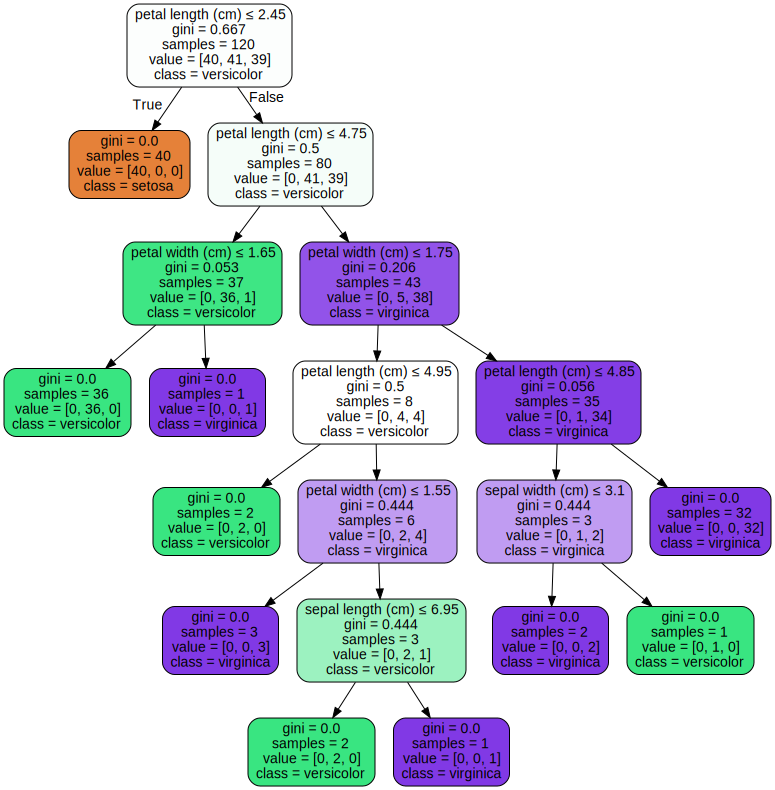

In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Overall, we can see this decision tree is splitting based using the attribute threshold leads to the lower Gini Index, 
e.g. gini = 0.<br>

I will illustrate again the calculation for the nodes in the box in case you are confused.

![title](Capture11.PNG)

Further Links:
https://en.wikipedia.org/wiki/Decision_tree_pruning
